## <div dir="rtl">  فاطمه کریمی باریکرسفی <br>


## <div dir="rtl"> 610301060

<div dir="rtl"> ابتدا کتابخانه هایی که در ادامه به آن ها احتیاج داریم را import  میکینم . 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sklearn.preprocessing
import sklearn.impute
import sklearn.linear_model
import sklearn.metrics
import sklearn.naive_bayes
import sklearn.preprocessing

from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

## <div dir="rtl"> سوال اول . 

## Loading data set

In [3]:
train_set = pd.read_csv('train_set.csv')
train_set

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,24,Private,396099,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,40,United-States,0.0
1,43,Private,24264,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,1.0
2,46,Federal-gov,140664,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,1.0
3,61,?,71467,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,40,United-States,1.0
4,33,Private,260782,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,41,United-States,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16356,41,Private,304605,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,45,United-States,1.0
16357,55,Private,200217,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,1.0
16358,17,Private,167658,12th,8,Never-married,Sales,Own-child,White,Female,6,United-States,0.0
16359,35,Private,112160,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,40,United-States,0.0


### <div dir="rtl"> 1.


Categorical Variables:<br>
    * workclass
    * education
    * marital-status
    * occupation
    * relationship
    * race
    * gender
    * native-country
<br>

Numerical Variables:
    * age
    * fnlwgt
    * educational-num
    * hours-per-week

### <div dir="rtl"> 2.  

<div dir="rtl"> همان طور که صورت سوال خواسته، داده های عددی در این قسمت نرمال سازی شده اند .

In [4]:
numerical_data = np.array(train_set[['age', 'fnlwgt', 'educational-num', 'hours-per-week']])
n = sklearn.preprocessing.normalize(numerical_data, norm='l2', axis=0)
train_set['age'] = n[:, 0]
train_set['fnlwgt'] = n[:, 1]
train_set['educational-num'] = n[:, 2]
train_set['hours-per-week'] = n[:, 3]

In [5]:
train_set

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,0.004406,Private,0.014286,Some-college,0.007156,Never-married,Adm-clerical,Not-in-family,White,Female,0.007153,United-States,0.0
1,0.007895,Private,0.000875,Some-college,0.007156,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.007153,United-States,1.0
2,0.008446,Federal-gov,0.005073,Some-college,0.007156,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.008584,United-States,1.0
3,0.011200,?,0.002578,HS-grad,0.006440,Married-civ-spouse,?,Husband,White,Male,0.007153,United-States,1.0
4,0.006059,Private,0.009405,Some-college,0.007156,Married-civ-spouse,Craft-repair,Husband,White,Male,0.007332,United-States,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16356,0.007528,Private,0.010986,Assoc-voc,0.007872,Married-civ-spouse,Craft-repair,Husband,White,Male,0.008048,United-States,1.0
16357,0.010098,Private,0.007221,10th,0.004294,Married-civ-spouse,Craft-repair,Husband,White,Male,0.007153,United-States,1.0
16358,0.003121,Private,0.006047,12th,0.005725,Never-married,Sales,Own-child,White,Female,0.001073,United-States,0.0
16359,0.006426,Private,0.004045,HS-grad,0.006440,Married-civ-spouse,Sales,Husband,White,Male,0.007153,United-States,0.0


<div dir="rtl">  با توجه به اینکه در دیتا ست داده شده بعضی از خونه های جدول مقداردهی نشده اند، آن ها را به طور دستی پر میکنیم تا در ادامه دچار مشکل نشویم . 

In [6]:
train_set.replace('?', np.nan, inplace = True)
train_set.isnull().sum()

age                  0
workclass          744
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation         746
relationship         0
race                 0
gender               0
hours-per-week       0
native-country     302
income               0
dtype: int64

In [7]:
imr = sklearn.impute.SimpleImputer(missing_values = np.nan, strategy="most_frequent")
imr = imr.fit(train_set)
imr_data = imr.transform(train_set.values)
imr_data

array([[0.004406496486012209, 'Private', 0.014285700649997294, ...,
        0.007153399523887786, 'United-States', 0.0],
       [0.007894972870771875, 'Private', 0.0008751050635612166, ...,
        0.007153399523887786, 'United-States', 1.0],
       [0.0084457849315234, 'Federal-gov', 0.005073185734453305, ...,
        0.008584079428665342, 'United-States', 1.0],
       ...,
       [0.003121268344258648, 'Private', 0.006046750937460701, ...,
        0.0010730099285831678, 'United-States', 0.0],
       [0.006426140708767804, 'Private', 0.004045160893876775, ...,
        0.007153399523887786, 'United-States', 0.0],
       [0.010832637194780012, 'Local-gov', 0.0038181615833733826, ...,
        0.005365049642915839, 'United-States', 0.0]], dtype=object)

In [8]:
train_set = pd.DataFrame(imr_data, columns = train_set.columns)

## <div dir="rtl"> سوال دوم .

### <div dir="rtl"> 1.

<div dir="rtl"> برای اینکه داده های اسمی را به عدد تبدیل کنیم، با توجه به اینکه هر ویژگی چه مقادیری را می تواند بگیرد متغیر های جدید تعریف می شود که مقادیر صفر یا یک خواهند داشت . این کار با دستور get_dummies از پکیج pandas انجام شده است .

In [10]:
categorical_data = pd.get_dummies(train_set[['workclass', 'education', 'marital-status', 'occupation', \
                                             'relationship', 'race', 'gender', 'native-country']])

<div dir="rtl"> در ادامه هدف این است که دیتاست جدید را ایجاد کنیم که در آن متغیرهای عددی نرمال سازی شده اند و متغیرهای اسمی به عدد تبدیل شده اند . 

In [11]:
train_set_new = train_set.drop('income', axis = 1, inplace = False)
train_set_new = train_set_new.join(categorical_data)
train_set_new.drop(['workclass', 'education', 'marital-status', 'occupation', \
                    'relationship', 'race', 'gender', 'native-country'], axis = 1, inplace = True)
train_set_new = train_set_new.join(train_set['income'])

<div dir="rtl"> دیتاستی که در ادامه ی این سوال با آن کار خواهیم کرد، در زیر نشان داده شده است .

In [12]:
train_set_new

,age,fnlwgt,educational-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,0.0044065,0.0142857,0.00715591,0.0071534,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.00789497,0.000875105,0.00715591,0.0071534,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.00844578,0.00507319,0.00715591,0.00858408,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.0111998,0.00257753,0.00644032,0.0071534,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.00605893,0.00940536,0.00715591,0.00733223,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16356,0.00752776,0.0109859,0.0078715,0.00804757,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
16357,0.0100982,0.00722102,0.00429355,0.0071534,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
16358,0.00312127,0.00604675,0.00572473,0.00107301,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
16359,0.00642614,0.00404516,0.00644032,0.0071534,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
y_train = np.array(train_set_new['income'])
y_train = y_train.astype('int')
x_train = np.array(train_set_new.drop('income', axis = 1, inplace = False))

### <div dir="rtl"> 2.

<div dir="rtl"> در این قسمت هدف این است که دسته بند Logistic Regression  را روی داده ها فیت کنیم . در اینجا برای اینکه می خواهیم الگوریتم گرادیان کاهشی را استفاده کنیم از SGDClassifier استفاده میکنیم و پارامتر loss آن را برابر Log قرار میدهیم تا در نهایت یک دسته بند Logistic Regression داشته باشیم .

<div dir="rtl"> حال مقدار خطا را برای حالت های خواسته شده با روش kfold cross_validation محاسبه میکنیم و در نهایت boxplot خطای آموزشی و خطای تست را رسم میکنیم . 

<div dir="rtl"> پارامتر alpha همان نرخ منظم سازی کاهش وزن ، پارامتر max_iter همان تعداد تکرار و پارامتر eta0 همان نرخ یادگیری ثابت می باشد .  

In [14]:
## Logistic Regression
## used SGDClassifier for implementation of Logistic Regression Classifier 

learning_rate = [1, 0.01, 0.00001]
regularization_rate = [0, 0.01, 0.00001]
iteration = [500, 1000, 2000]

error_train = np.empty((27, 2))
error_test = np.empty((27, 2))

n = 0
for lr in learning_rate:
    for rr in regularization_rate:
        for i in iteration:
            
            ce_train = np.empty((2, 5))
            ce_test = np.empty((2, 5))
            for j in [0, 1]:
                X = np.arange(0, len(x_train))
                kf = KFold(n_splits = 5, shuffle = True)
                k = 0
                for train, test in kf.split(X):
                    classifier = sklearn.linear_model.SGDClassifier(loss = 'log', penalty = 'l2', alpha = rr,\
                                               fit_intercept = False, max_iter = i, tol = None,\
                                               shuffle = False, learning_rate = 'constant', eta0 = lr, power_t = 0)
                    classifier.fit(x_train[train], y_train[train])
                    
                    ce_train[j][k] = log_loss(y_train[train], classifier.predict(x_train[train]))
                    ce_test[j][k] = log_loss(y_train[test], classifier.predict(x_train[test]))
                    
                    k = k + 1
            for j in [0, 1]:
                error_train[n][j] = ce_train[j].mean()
                error_test[n][j] = ce_test[j].mean()
            n = n + 1

<div dir="rtl"> boxplot مربوط به خطای آموزشی :

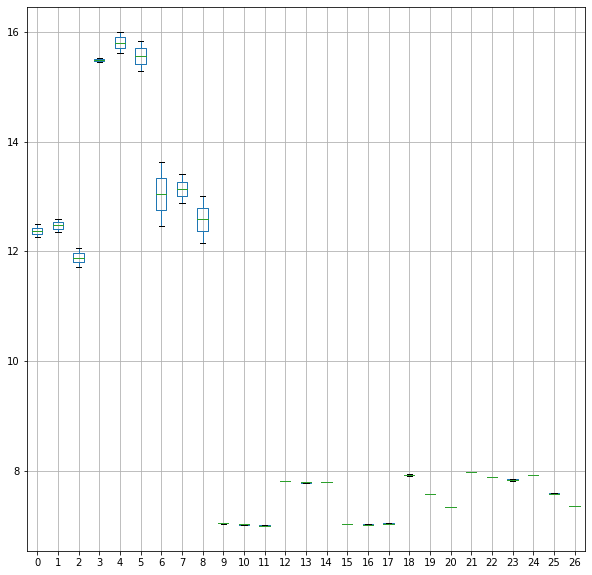

In [15]:
train_validation = pd.DataFrame({'0': error_train[0],\
                                 '1': error_train[1],\
                                 '2': error_train[2],\
                                 '3': error_train[3],\
                                 '4': error_train[4],\
                                 '5': error_train[5],\
                                 '6': error_train[6],\
                                 '7': error_train[7],\
                                 '8': error_train[8],\
                                 '9': error_train[9],\
                                 '10': error_train[10],\
                                 '11': error_train[11],\
                                 '12': error_train[12],\
                                 '13': error_train[13],\
                                 '14': error_train[14],\
                                 '15': error_train[15],\
                                 '16': error_train[16],\
                                 '17': error_train[17],\
                                 '18': error_train[18],\
                                 '19': error_train[19],\
                                 '20': error_train[20],\
                                 '21': error_train[21],\
                                 '22': error_train[22],\
                                 '23': error_train[23],\
                                 '24': error_train[24],\
                                 '25': error_train[25],\
                                 '26': error_train[26]})
train_validation.boxplot(figsize=(10,10))

<div dir="rtl"> boxplot مربوط به خطای تست :

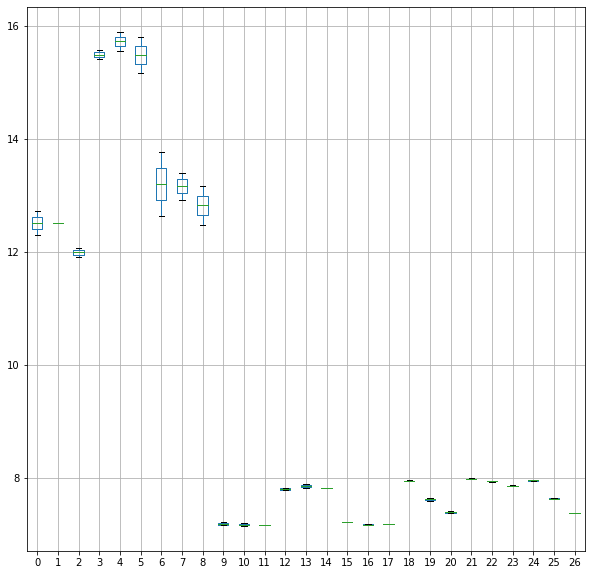

In [16]:
test_validation = pd.DataFrame({ '0': error_test[0],\
                                 '1': error_test[1],\
                                 '2': error_test[2],\
                                 '3': error_test[3],\
                                 '4': error_test[4],\
                                 '5': error_test[5],\
                                 '6': error_test[6],\
                                 '7': error_test[7],\
                                 '8': error_test[8],\
                                 '9': error_test[9],\
                                 '10': error_test[10],\
                                 '11': error_test[11],\
                                 '12': error_test[12],\
                                 '13': error_test[13],\
                                 '14': error_test[14],\
                                 '15': error_test[15],\
                                 '16': error_test[16],\
                                 '17': error_test[17],\
                                 '18': error_test[18],\
                                 '19': error_test[19],\
                                 '20': error_test[20],\
                                 '21': error_test[21],\
                                 '22': error_test[22],\
                                 '23': error_test[23],\
                                 '24': error_test[24],\
                                 '25': error_test[25],\
                                 '26': error_test[26]})
test_validation.boxplot(figsize=(10,10))

### <div dir="rtl"> 3.

<div dir="rtl"> باتوجه به نمودارهای قسمت قبل مدل با نرخ یادگیری 0.01 ، نرخ منظم سازی کاهش وزن 0 و تعداد تکرار 2000 مدل بهینه می باشد . 

### <div dir="rtl"> 4.

<div dir="rtl"> حال مدل بهینه ای که در قسمت قبل مشخص کردیم را روی داده های آموزشی فیت میکنیم و بر روی داده های تست اجرا میکنیم . 

<div dir="rtl"> در این قسمت مدل نهایی ساخته شده است . 

In [18]:
final_model = sklearn.linear_model.SGDClassifier(loss = 'log', penalty = 'l2', alpha = 0,\
                                                fit_intercept = False, max_iter = 2000, tol = None,\
                                                shuffle = False, learning_rate = 'constant', eta0 = 0.01, power_t = 0)
final_model.fit(x_train, y_train)

SGDClassifier(alpha=0, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.01, fit_intercept=False, l1_ratio=0.15,
              learning_rate='constant', loss='log', max_iter=2000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0,
              random_state=None, shuffle=False, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

<div dir="rtl"> در ادامه داده های تست را آن طور که باید به دسته بند بدهیم آماده میکینم .

<div dir="rtl"> ابتدا داده های عددی نرمال سازی شده اند سپس داده های اسمی به عددی تبدیل شده است .

In [19]:
x_test = pd.read_csv('test_set.csv')

numerical_data_test = np.array(x_test[['age', 'fnlwgt', 'educational-num', 'hours-per-week']])
numerical_data_test = sklearn.preprocessing.normalize(numerical_data_test, norm='l2', axis=0)
x_test['age'] = numerical_data_test[:, 0]
x_test['fnlwgt'] = numerical_data_test[:, 1]
x_test['educational-num'] = numerical_data_test[:, 2]
x_test['hours-per-week'] = numerical_data_test[:, 3]

In [20]:
x_test.replace('?', np.nan, inplace = True)
x_test.isnull().sum()

age                  0
workclass          323
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation         325
relationship         0
race                 0
gender               0
hours-per-week       0
native-country     115
dtype: int64

In [21]:
imr_test = sklearn.impute.SimpleImputer(missing_values = np.nan, strategy="most_frequent")
imr_test = imr_test.fit(x_test)
imr_data_test = imr_test.transform(x_test.values)
x_test = pd.DataFrame(imr_data_test, columns = x_test.columns)

In [22]:
categorical_data_test = pd.get_dummies(x_test[['workclass', 'education', 'marital-status', 'occupation', \
                                           'relationship', 'race', 'gender', 'native-country']])
x_test = x_test.join(categorical_data_test)
x_test.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], \
           axis = 1, inplace = True)

<div dir="rtl"> با توجه به اینکه بعد داده های تست با آموزشی یکسان نیست بررسی میکنیم تا ببینیم که کدام ویژگی را در داده های تست نداریم و آن را دستی با مقدار صفر وارد داده های تست میکنیم و در نهایت به مدل برای پیشبینی می دهیم . 

In [23]:
[item for item in train_set_new.columns if item not in x_test.columns]

['native-country_Holand-Netherlands', 'income']

In [24]:
i = train_set_new.columns.get_loc('native-country_Holand-Netherlands')
x_test.insert(loc = i, column= 'native-country_Holand-Netherlands', value= 0)

In [25]:
x_test

,age,fnlwgt,educational-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0122818,0.0190033,0.0142659,0.0108847,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.00949049,0.00958418,0.00987637,0.0108847,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.00949049,0.0105102,0.00987637,0.0108847,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.00921136,0.00780045,0.0109737,0.0136058,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.00753657,0.0187747,0.0109737,0.0103404,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7008,0.00976962,0.0023222,0.0131685,0.0108847,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7009,0.0108861,0.0271192,0.0142659,0.0122452,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7010,0.00558264,0.0123617,0.00987637,0.00625868,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7011,0.00837396,0.00698218,0.0142659,0.0108847,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
y_test_pred = final_model.predict(x_test)
y_test_pred 

array([0, 0, 1, ..., 0, 0, 1])

In [27]:
np.savetxt("prediction_lr.csv", y_test_pred)

## <div dir="rtl"> سوال سوم .

### <div dir="rtl"> 1.

<div dir="rtl"> با توجه به اینکه بعضی از ویژگی ها اسمی و بعضی دیگر عددی هستند ابتدا برای هر نوع از ویژگی ها یک دسته بند با توضیع احتمال متناظر با نوع آن کمیت ایجاد میکنیم و حاصل احتمال های بدست آمده از هر دو دسته بندها را در هم ضرب میکنیم و در نهایت با توجه به حاصل به دست آمده دسته ی نهایی را مشخص میکنیم .

In [28]:
categorical_features = train_set[['workclass', 'education', 'marital-status', 'occupation', \
                                  'relationship', 'race', 'gender', 'native-country']]
numerical_features = train_set[['age', 'fnlwgt', 'educational-num', 'hours-per-week']]

In [29]:
cat_data = pd.get_dummies(categorical_features)
cat_data = np.array(cat_data)

num_data = np.array(numerical_features)

In [30]:
ce_cv_train = np.empty((2, 5))
ce_cv_test = np.empty((2, 5))

for i in [0, 1]:
    X = np.arange(0, len(x_train))
    kf = KFold(n_splits = 5, shuffle = True)
    k = 0
    for train, test in kf.split(X):
        
        cat_clf = sklearn.naive_bayes.MultinomialNB()
        cat_clf.fit(cat_data[train], y_train[train])
        
        num_clf = sklearn.naive_bayes.GaussianNB()
        num_clf.fit(num_data[train], y_train[train])
        
        P = np.multiply(cat_clf.predict_proba(cat_data), num_clf.predict_proba(num_data))

        P_train = P[train]
        P_test = P[test]
        
        y_pred_train = np.empty(len(train))
        for j in range(0, len(train)):
            if (P_train[j][0] >= P_train[j][1]):
                y_pred_train[j] = 0
            else:
                y_pred_train[j] = 1
        
        ce_cv_train[i][k] = log_loss(y_pred_train, y_train[train])
        
        
        y_pred_test = np.empty(len(test))
        for j in range(0, len(test)):
            if (P_test[j][0] >= P_test[j][1]):
                y_pred_test[j] = 0
            else:
                y_pred_test[j] = 1
        
        ce_cv_test[i][k] = log_loss(y_pred_test, y_train[test])
        
        k = k + 1        

In [38]:
ce_cv_train1 = np.empty(2)
ce_cv_test1 = np.empty(2)

ce_cv_train1[0] = ce_cv_train[0].mean()
ce_cv_train1[1] = ce_cv_train[1].mean()
ce_cv_test1[0] = ce_cv_test[0].mean()
ce_cv_test1[1] = ce_cv_test[1].mean()

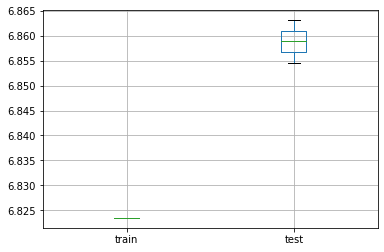

In [39]:
pd.DataFrame({'train': ce_cv_train1, 'test': ce_cv_test1}).boxplot()

### <div dir="rtl"> 2.

<div dir="rtl"> با توجه به نمودار بدست آمده می توان گفت مدل بیزین ساده از مدل Logistic Regression با پارامترهای داده شده بهتر عمل میکند . 

### <div dir="rtl"> 3.

In [41]:
categorical_features = train_set[['workclass', 'education', 'marital-status', 'occupation', \
                                  'relationship', 'race', 'gender', 'native-country']]
numerical_features = train_set[['age', 'fnlwgt', 'educational-num', 'hours-per-week']]

cat_data = pd.get_dummies(categorical_features)
cat_data = np.array(cat_data)

num_data = np.array(numerical_features)

In [42]:
final_cat_clf = sklearn.naive_bayes.CategoricalNB()
final_cat_clf.fit(cat_data, y_train)
        
final_num_clf = sklearn.naive_bayes.GaussianNB()
final_num_clf.fit(num_data, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
P_cat = final_cat_clf.predict_proba(np.array(x_test.drop(['age', 'fnlwgt', 'educational-num', 'hours-per-week'],\
                                                        axis = 1, inplace = False)))
P_num = final_num_clf.predict_proba(np.array(x_test[['age', 'fnlwgt', 'educational-num', 'hours-per-week']]))
P = np.multiply(P_cat, P_num)

y_pred_nb = np.empty(len(x_test))
for i in range(0, len(x_test)):
    if (P[i][0] >= P[i][1]):
        y_pred_nb[i] = 0
    else:
        y_pred_nb[i] = 1
        
y_pred_nb        

array([0., 0., 1., ..., 0., 1., 1.])

In [44]:
np.savetxt("prediction_b.csv", y_pred_nb)

## <div dir="rtl"> سوال چهارم .

<div dir="rtl"> در مدل naive bayes classifier یک فرضی که در واقعیت فرض درستی نیست این است که متغیرها مستقل از همدیگر به متغیر نهایی مربوط میشوند . این فرض باعث میشود که مدل در بعضی مواقع بیش از اندازه ساده شود. برای افزایش دقت میتوان بررسی کرد که اگر ویژگی ها با تقریب خوبی مستقل از هم بودند از این مدل استفاده کرد .